# Proyek Analisis Data: Bike Sharing Dataset
- **Nama: Billie Zandra Widiyanto
- **Email: billiezandraw@gmail.com
- **ID Dicoding: -

## Menentukan Pertanyaan Bisnis

- Apakah jumlah penyewaan sepeda lebih banyak pada saat akhir pekan dibandingkan pada saat hari kerja?
- Apakah hari libur menyebabkan peningkatan yang signifikan dalam jumlah penyewaan sepeda?
- Apakah pengguna registered menyewa sepeda secara stabil setiap hari sementara pengguna casual lebih bervariasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
# memanggil semua Packages/library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Tujuan**

- Mengumpulkan dataset yang digunakan dalam analisis ini. dataset yang digunakan dalam analisis ini adalah day.csv dan hour.csv, dimana kedua data ini berisi data penyewaan sepeda harian dan perjam.

In [2]:
# load day.csv
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load hour.csv
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv: 
  terdiri dari 731 entri, masing-masing mewakili data harian dari 1 Januari 2011 hingga 31 Desember 2012.
- hour.csv: 
  terdiri dari 17.379 entri, mewakili data per jam dari 1 Januari 2011 hingga 19 Desember 2012.

### Assessing Data

**Tujuan**

- Mengevaluasi dataset untuk memastikan bahwa data yang digunakan lengkap dan sesuai. Pada tahap ini, dilakukan pemeriksaan struktur dataset, nilai yang hilang, tipe data, dan duplikasi.

In [4]:
# memeriksa kolom-kolom yang terdapat pada day.csv dan hour.csv
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# Melakukan pengecekan missing value pada day.csv
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Melakukan pengecekan missing value pada hour.csv
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# memeriksa duplikasi 
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- day.csv: terdapat 16 kolom yaitu, instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, wearhersit, remp, atemp, hum, windspeed, casual, registered, dan cnt.
- hour.csv: terdapat 15 kolom yaitu, instant, dteday, season, yr, mnth, holiday, weekday, workingday, wearhersit, remp, atemp, hum, windspeed, casual, registered, dan cnt.
- tidak terdapat missing value dan duplikasi pada day.csv maupun hour.csv

### Cleaning Data

**Tujuan**

- Melakukan perubahan format objek data 'dteday' ke dalam format datetime.
- Memisahkan hari yang merupakan hari kerja dengan akhir pekan (sabtu dan minggu).
- mengganti nama kolom agar mempermudah keterbacaan.

In [8]:
# Konversi 'dteday' dari format objek ke format datetime dari 2 dataset
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Ekstraksi fitur tambahan untuk analisis
# Tambahkan kolom 'is_weekend' di mana 1 = akhir pekan (Sabtu atau Minggu), 0 = hari kerja
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Mengubah nama kolom agar lebih mudah dipahami
day_df.rename(columns={
    'dteday': 'date',        
    'yr': 'year',            
    'mnth': 'month',         
    'weathersit': 'weather', 
    'cnt': 'total_rentals',  
    'hum': 'humidity',      
    'temp': 'temperature',   
    'atemp': 'feels_temp',   
    'windspeed': 'wind_speed', 
}, inplace=True)

hour_df.rename(columns={
    'dteday': 'date',        
    'yr': 'year',            
    'mnth': 'month',         
    'weathersit': 'weather', 
    'cnt': 'total_rentals',  
    'hum': 'humidity',       
    'temp': 'temperature',   
    'atemp': 'feels_temp',   
    'windspeed': 'wind_speed', 
}, inplace=True)

# Mengelompokkan untuk jumlah total penyewaan per hari dan per tipe pengguna
day_grouped = day_df.groupby(['is_weekend', 'holiday'], as_index=False)[['total_rentals', 'casual', 'registered']].sum()

# Memeriksa cleaned data
day_grouped.head()

,is_weekend,holiday,total_rentals,casual,registered
0,0,0,2292410,303285,1989125
1,0,1,78435,22359,56076
2,1,0,921834,294373,627461


In [9]:
# memeriksa nama kolom-kolom yang berubah pada day.csv dan hour.csv
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   date           731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   year           731 non-null    int64         
 4   month          731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weather        731 non-null    int64         
 9   temperature    731 non-null    float64       
 10  feels_temp     731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  wind_speed     731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_rentals  731 non-

In [10]:
# Export cleaned day.csv data
day_df.to_csv('./dashboard/clean_day.csv', index=False)

# Export cleaned hour.csv data
hour_df.to_csv('./dashboard/clean_hour.csv', index=False)

**Insight:**
- Menambahkan kolom 'is_weekend' untuk memisakkan akhir pekan (weekend) sebagai 1 dan hari kerja (weekday) sebagai 0.
- Menggunakan kolom 'holiday' untuk mempertahankan informasi apakah hari kerja merupakan hari libur.
- Menggunakan kolom 'casual' dan registerd secara terpisah untuk melihat perbedaan pola penyewaan keduanya.
- Mengkonversi kolom 'dteday' dari format objek ke format datetime dari 2 dataset.
- Mengubah nama-nama kolom dari 2 dataset untuk mempermudah keterbacaan.
- Menyimpan dataset yang telah di cleaning ke dalam folder dashboard.

## Exploratory Data Analysis (EDA)

**Tujuan**

- Mengeksplorasi data dan menemukan pola, tren, dan anomali di dalam dataset. Teknik seperti `groupby` digunakan untuk menghitung rata-rata penyewaan sepeda berdasarkan kategori.

**Metode**
- Menghitung rata-rata penyewaan sepeda berdasarkan hari dan tipe pengguna untuk mendapatkan insight dari data set.

### Explore day_df

In [11]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feels_temp,humidity,wind_speed,casual,registered,total_rentals,is_weekend
119,120,2011-04-30,2,0,4,0,6,0,1,0.472500,0.464021,0.503333,0.235075,1965,3347,5312,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195,0
266,267,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423,1
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788,1


In [12]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,feels_temp,humidity,wind_speed,casual,registered,total_rentals,is_weekend
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.287278
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,1.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,1.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.452802


In [13]:
# Melihat rata-rata penyewaan sepeda berdasarkan hari kerja dan akhir pekan
day_df.groupby('is_weekend')['total_rentals'].mean().reset_index()

,is_weekend,total_rentals
0,0,4550.566219
1,1,4389.685714


In [14]:
# Melihat rata-rata penyewaan sepeda berdasarkan hari libur dan non-libur
day_df.groupby('holiday')['total_rentals'].mean().reset_index()

,holiday,total_rentals
0,0,4527.104225
1,1,3735.000000


### Explore hour_df

In [15]:
hour_df.sample(5)

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temperature,feels_temp,humidity,wind_speed,casual,registered,total_rentals,is_weekend
9613,9614,2012-02-10,1,1,2,12,0,5,1,2,0.30,0.3030,0.42,0.1343,8,168,176,0
6009,6010,2011-09-12,3,0,9,23,0,1,1,1,0.62,0.5758,0.83,0.1045,7,62,69,0
6185,6186,2011-09-20,3,0,9,7,0,2,1,2,0.54,0.5152,0.88,0.1642,23,306,329,0
12546,12547,2012-06-11,2,1,6,23,0,1,1,2,0.70,0.6515,0.58,0.2239,8,72,80,0
10463,10464,2012-03-17,1,1,3,2,0,6,0,2,0.44,0.4394,0.88,0.0000,10,32,42,1


In [16]:
hour_df.describe(include="all")

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,temperature,feels_temp,humidity,wind_speed,casual,registered,total_rentals,is_weekend
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.288509
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,1.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.453082


In [17]:
# Melihat rata-rata penyewaan pengguna casual dan registered berdasarkan hari kerja atau akhir pekan
hour_df.groupby(['is_weekend'])[['casual', 'registered']].mean().reset_index()

,is_weekend,casual,registered
0,0,26.335948,165.402426
1,1,58.710211,125.141803


**Insight:**
- Penyewaan sepeda pada hari kerja cenderung lebih tinggi daripada akhir pekan, dengan perbandingan 4550 sepeda pada hari kerja dibanding 4389 sepeda pada akhir pekan
- Jumlah penyewaan sepeda lebih rendah pada hari libur dibandingkan hari non-libur, dengan perbandingan 4527 sepeda pada hari non libur dibanding 3735 sepeda pada hari libur (bukan termasuk akhir pekan)
- Pengguna registered (terdaftar) menyewa lebih banyak sepeda pada hari kerja dibandingkan akhir pekan.
- Pengguna casual cenderung menyewa lebih banyak sepeda pada akhir pekan dibandingkan hari kerja.

## Visualization & Explanatory Analysis

**Tujuan**

- Menampilkan hasil analisis dalam bentuk grafik untuk memudahkan pemahaman.
- Menjelaskan hasil dari analisis secara naratif, dengan tujuan memberikan insight.

### Pertanyaan 1: Apakah jumlah penyewaan sepeda lebih banyak pada saat akhir pekan dibandingkan pada saat hari kerja?

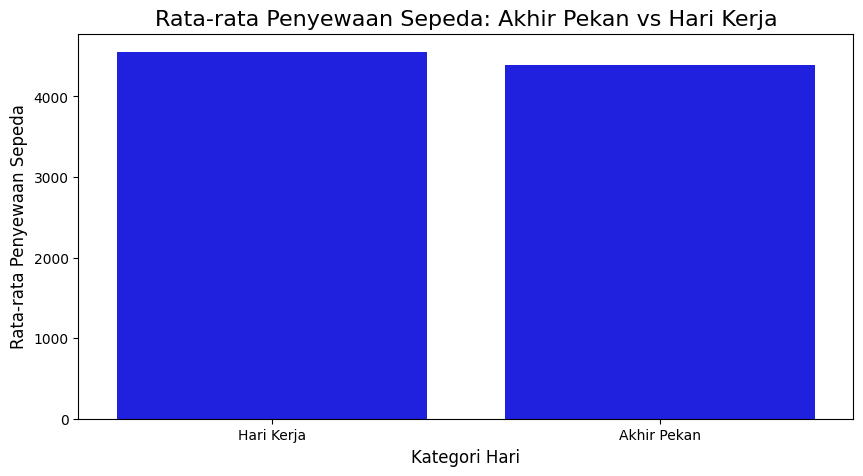

In [18]:
# Melakukan groupby berdasarkan akhir pekan dan menghitung rata-rata penyewaan sepeda
avg_rentals_by_weekend = day_df.groupby('is_weekend')['total_rentals'].mean().reset_index()
avg_rentals_by_weekend['is_weekend'] = avg_rentals_by_weekend['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Membuat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='is_weekend', y='total_rentals', data=avg_rentals_by_weekend, dodge=False, color="blue")

# Membuat label dan judul
plt.title("Rata-rata Penyewaan Sepeda: Akhir Pekan vs Hari Kerja", fontsize=16)
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.show()


Berdasarkan grafik di atas dapat terlihat penurunan pada penyewaan sepeda pada akhir pekan dibandingkan dari hari kerja.

### Pertanyaan 2: Apakah hari libur menyebabkan peningkatan yang signifikan dalam jumlah penyewaan sepeda?

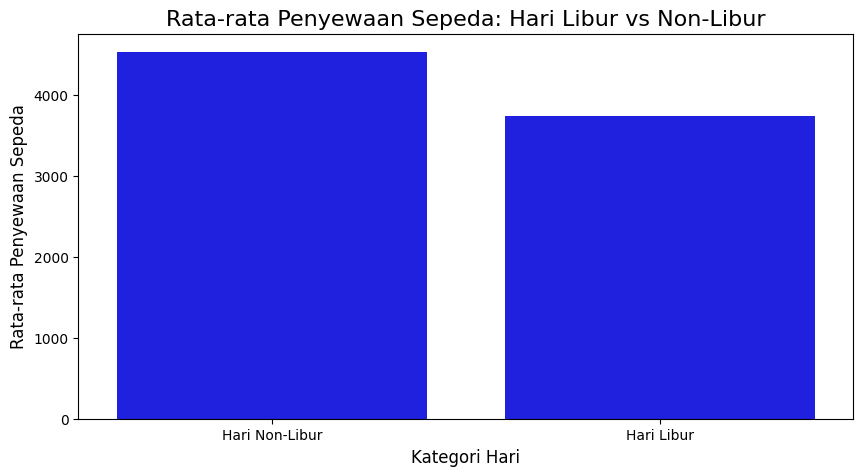

In [20]:
# Melakukan groupby berdasarkan hari libur dan menghitung rata-rata penyewaan sepeda
avg_rentals_by_holiday = day_df.groupby('holiday')['total_rentals'].mean().reset_index()
avg_rentals_by_holiday['holiday'] = avg_rentals_by_holiday['holiday'].map({0: 'Hari Non-Libur', 1: 'Hari Libur'})

# Membuat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='holiday', y='total_rentals', data=avg_rentals_by_holiday, dodge=False, color="blue")

# Membuat label dan judul
plt.title("Rata-rata Penyewaan Sepeda: Hari Libur vs Non-Libur", fontsize=16)
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.show()

Berdasarkan grafik di atas dapat terlihat penurunan sepeda padahari libur dibandingkan hari biasa.

### Pertanyaan 3: Apakah pengguna registered menyewa sepeda secara stabil setiap hari sementara pengguna casual lebih bervariasi?

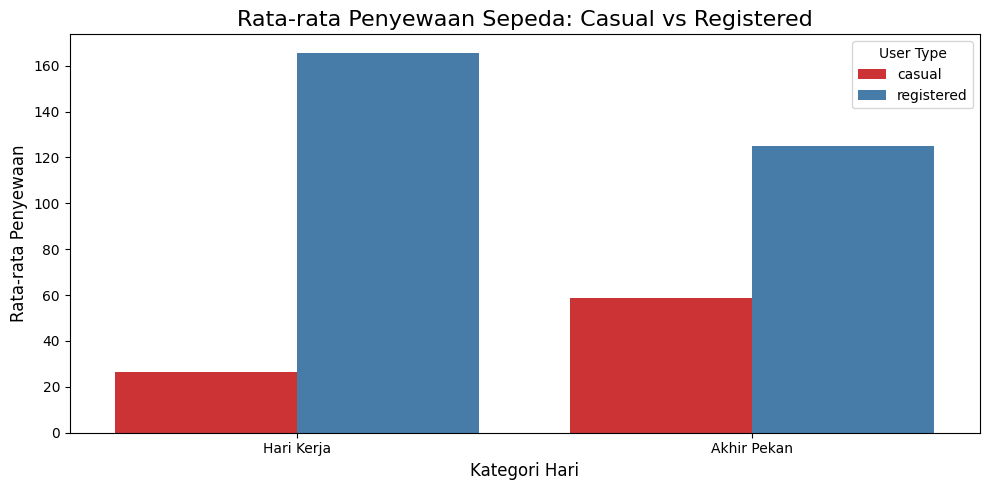

In [21]:
# Melakukan groupby berdasarkan hari kerja atau akhir pekan dan menghitung rata-rata penyewaan untuk casual dan registered
avg_rentals_by_user_type = hour_df.groupby('is_weekend')[['casual', 'registered']].mean().reset_index()
avg_rentals_by_user_type['is_weekend'] = avg_rentals_by_user_type['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

avg_rentals_melted = avg_rentals_by_user_type.melt(id_vars='is_weekend', value_vars=['casual', 'registered'], var_name='User Type', value_name='Rata-rata Penyewaan')

# Membuat bar char
plt.figure(figsize=(10, 5))
sns.barplot(x='is_weekend', y='Rata-rata Penyewaan', hue='User Type', data=avg_rentals_melted, palette="Set1")

# Membuat label dan judul
plt.title("Rata-rata Penyewaan Sepeda: Casual vs Registered", fontsize=16)
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Pada grafik di atas dapat terlihat penurunan persewaan sepeda dari pengguna registered, sedangkan persewaan sepeda dari pengguna casual mengalami peningkatan.

**Insight:**
- Pengguna registered lebih aktif pada hari kerja dibandingkan pada saat hari libur ataupun akhir pekan.
- Pengguna casual lebih aktif pada akhir pekan dibandingkan pada saat hari kerja.
- Pada hari libur ada penurunan signifikan dalam jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

### RFM Analysis:

**Tujuan**
- mengidentifikasi pola perilaku penyewaan sepeda dari dua kelompok pengguna (registered & casual), serta memahami segmen mana yang lebih sering melakukan penyewaan.

- Recency: Jumlah hari sejak pengguna terakhir kali menyewa sepeda.
- Frequency: Jumlah penyewaan sepeda oleh pengguna dalam periode tertentu.
- Monetary: Total sepeda yang disewa dalam periode tertentu.

In [35]:
# RFM ANALYSIS - DATA PREPARATION

# Membuat kolom 'year_day'
day_df['year_day'] = day_df['date'].dt.dayofyear
last_day = day_df['year_day'].max()

# RECENCY:
recency = day_df.groupby(['registered', 'casual']).agg({
    'year_day': lambda x: last_day - x.max()  
}).reset_index()

# FREQUENCY:
frequency = day_df.groupby(['registered', 'casual']).agg({
    'total_rentals': 'sum' 
}).reset_index()

# MONETARY: 
monetary = day_df.groupby(['registered', 'casual']).agg({
    'total_rentals': 'mean'  
}).reset_index()

# MERGE:
rfm_df = recency.merge(frequency, on=['registered', 'casual']).merge(monetary, on=['registered', 'casual'])
rfm_df.columns = ['registered', 'casual', 'recency', 'frequency', 'monetary']
rfm_df.head()

,registered,casual,recency,frequency,monetary
0,20,2,63,22,22.0
1,416,15,339,431,431.0
2,432,9,5,441,441.0
3,451,303,7,754,754.0
4,472,34,340,506,506.0


## Conclusion

**Apakah jumlah penyewaan sepeda lebih banyak pada saat akhir pekan dibandingkan pada saat hari kerja?**
- Rata-rata jumlah penyewaan sepeda pada hari kerja (4550 penyewa) sedikit lebih tinggi dibandingkan dengan akhir pekan (4389 penyewa). Meskipun banyak orang yang berasumsi bahwa penyewaan sepeda akan lebih tinggi di akhir pekan karena waktu luang, data menunjukkan bahwa orang lebih sering menyewa sepeda pada hari kerja.

**Apakah hari libur menyebabkan peningkatan yang signifikan dalam jumlah penyewaan sepeda?**
- Tidak ada peningkatan signifikan dalam jumlah penyewaan sepeda pada hari libur (3735 penyewa) dibandingkan hari biasa (4527 penyewa). berdasarkan hasil yang didapatkan, penyewaan sepeda cenderung turun pada hari libur dibandingkan hari biasa.

**Apakah pengguna registered menyewa sepeda secara stabil setiap hari sementara pengguna casual lebih bervariasi?**
- Pengguna registered cenderung lebih stabil dalam hal penyewaan sepeda, dengan jumlah penyewaan yang lebih konsisten antara hari kerja dan akhir pekan. walaupun terdapat penurunan pada akhir pekan, jumlahnya tidak terlalu signifikan.
- Pengguna casual menunjukkan variasi yang lebih besar, dengan peningkatan yang signifikan dalam penyewaan selama akhir pekan.